In [1]:
## Our standard imports
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

# set text displays for sklearn
from sklearn import set_config
set_config(display='text')

## read in the Data/student/student-mat.csv (it uses ";" as the sep)
df = pd.read_csv('Data/student/student-mat.csv',sep =';')
# display info and .head
df.info()
df.head()

In [2]:
Sales_P = pd.read_csv(r"Data/sales_predictions_2023.csv")
Sales_P.head()
Sales_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
#No duplicate data to drop
Sales_P.duplicated().sum()

0

In [4]:
Sales_P.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# Replaced the Ordinal features
Sales_P['Item_Fat_Content'].nunique()

5

In [6]:
replacement_dictionary= {'Low Fat':0,'LF':0,'low fat':0,'Regular':1,'reg':1}
Sales_P['Item_Fat_Content'].replace(replacement_dictionary, inplace= True)
Sales_P['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [7]:
Sales_P['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

I droped the column because it would produce a really long one hot encoder and I was told to do so by the assingment.

In [8]:
del Sales_P['Item_Identifier']
del Sales_P['Outlet_Identifier']

In [9]:
Sales_P.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.477836,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,1.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,2009.000000,13086.964800


# Part 3

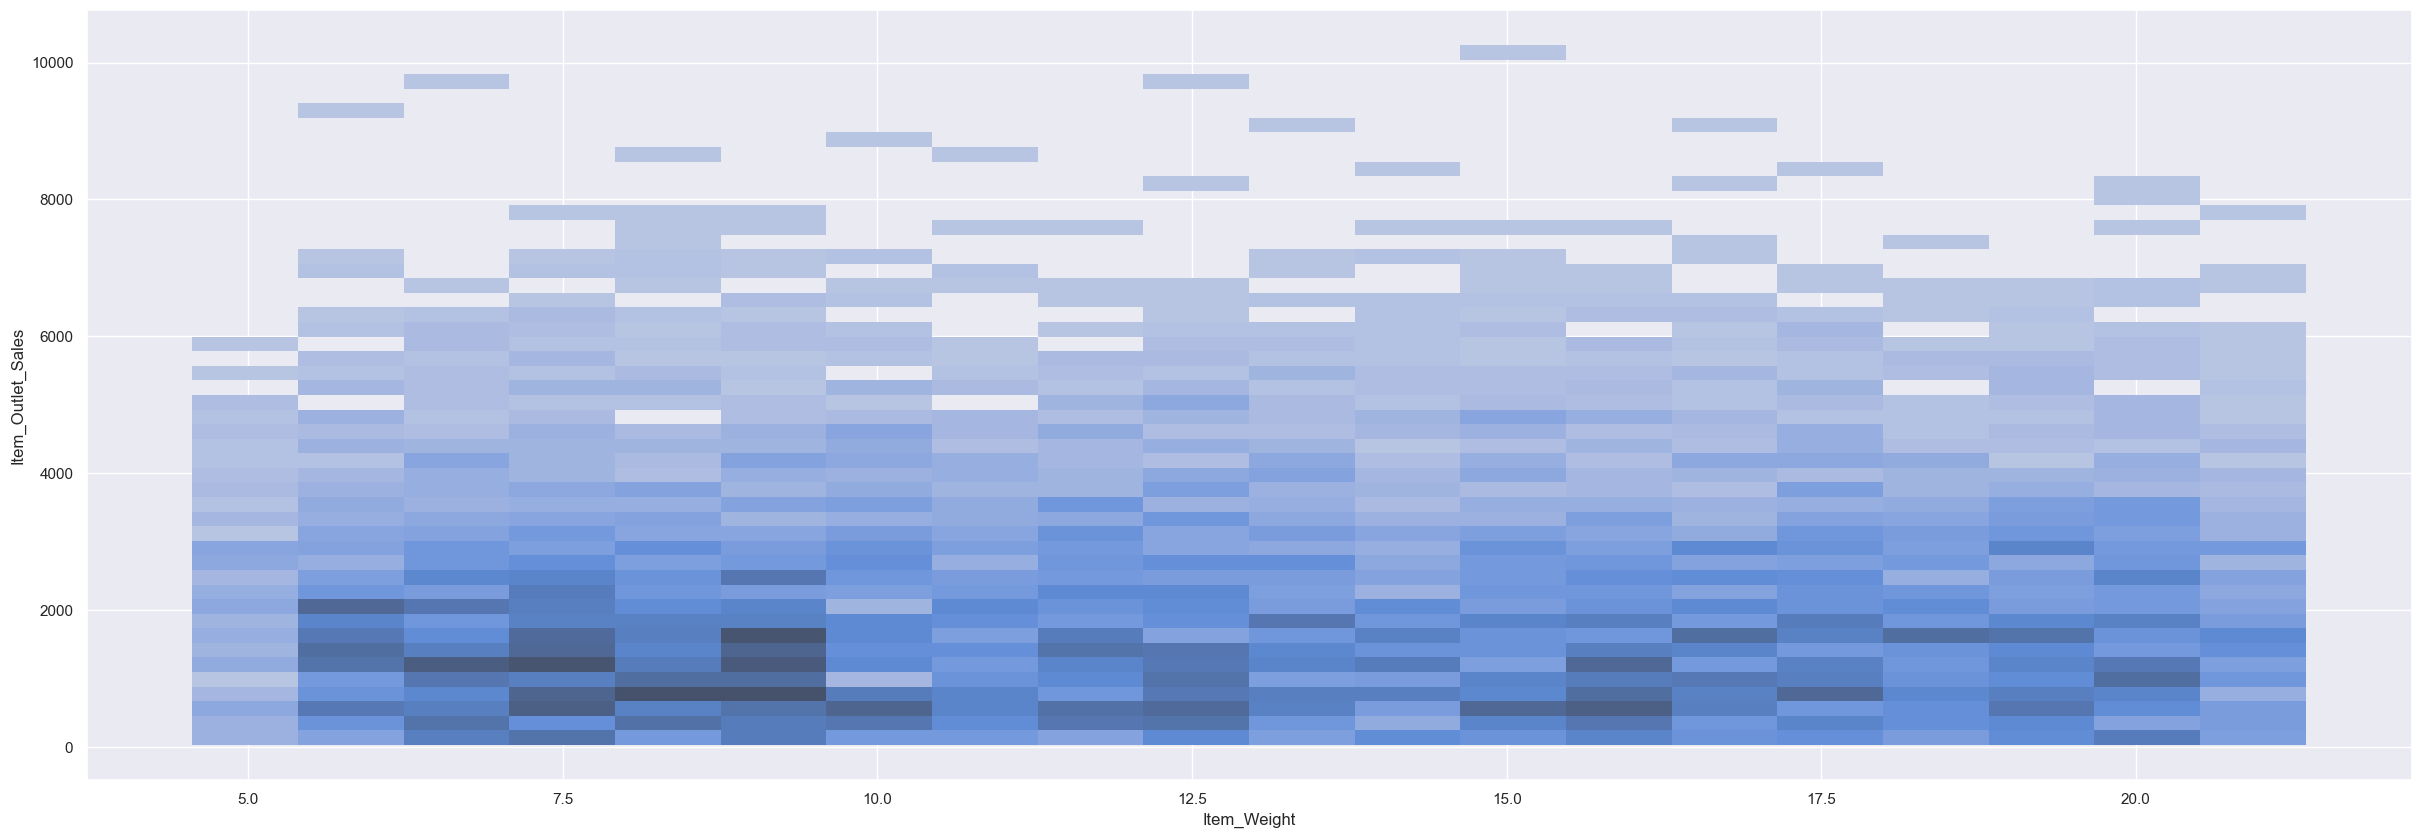

In [10]:
sns.set(rc={'figure.figsize':(30,10)})
sns.histplot(data=Sales_P,x='Item_Weight',y='Item_Outlet_Sales')
plt.show()

Boxplot to view statistical summaries of various features in your dataset.

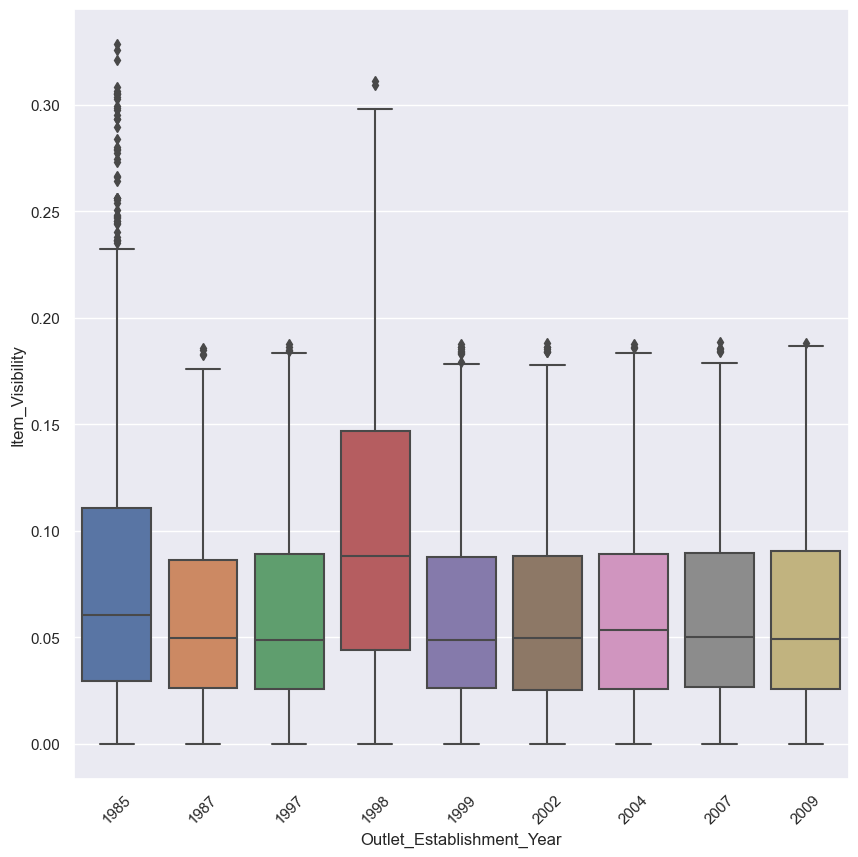

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=45)
sns.boxplot(data=Sales_P, x='Outlet_Establishment_Year', y= 'Item_Visibility')  
plt.show()

Heatmap of the correlation between features.

C:\Users\miran\AppData\Local\Temp\ipykernel_71276\3681481867.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Sales_P.corr(),annot=True,cmap='Blues');


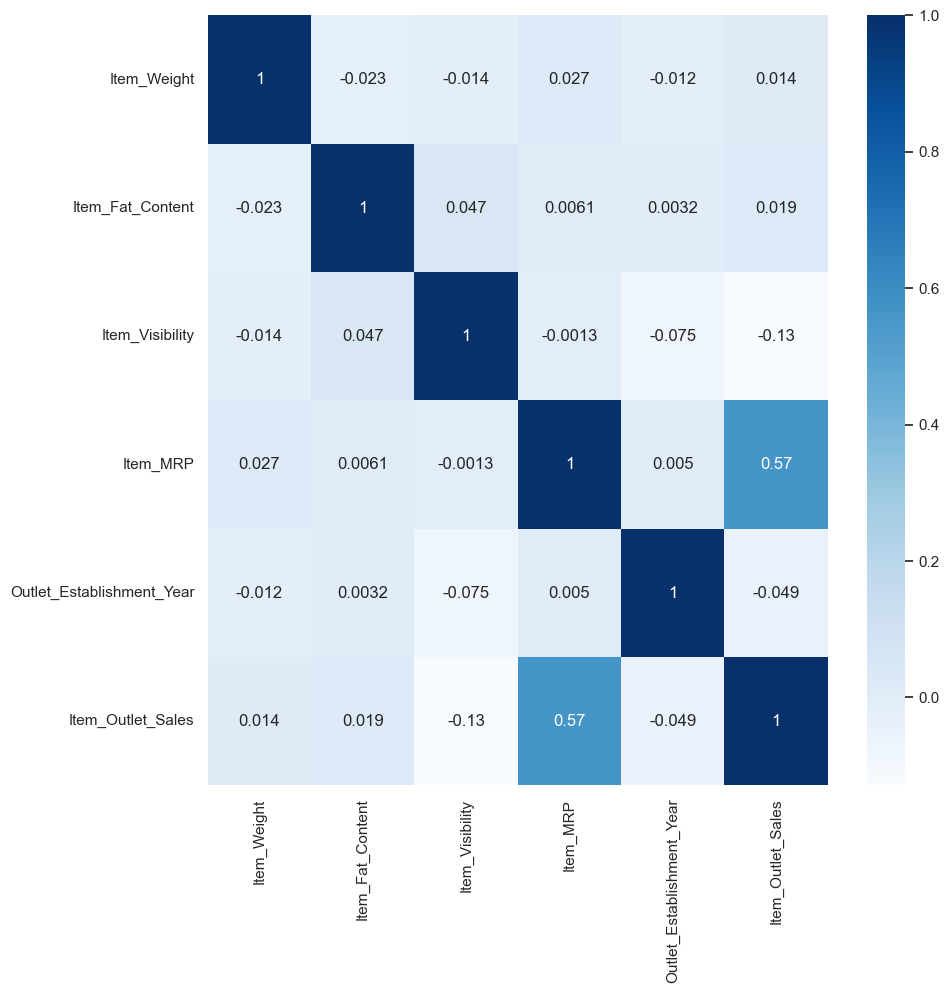

In [12]:
sns.heatmap(Sales_P.corr(),annot=True,cmap='Blues');


# Part 4 Core

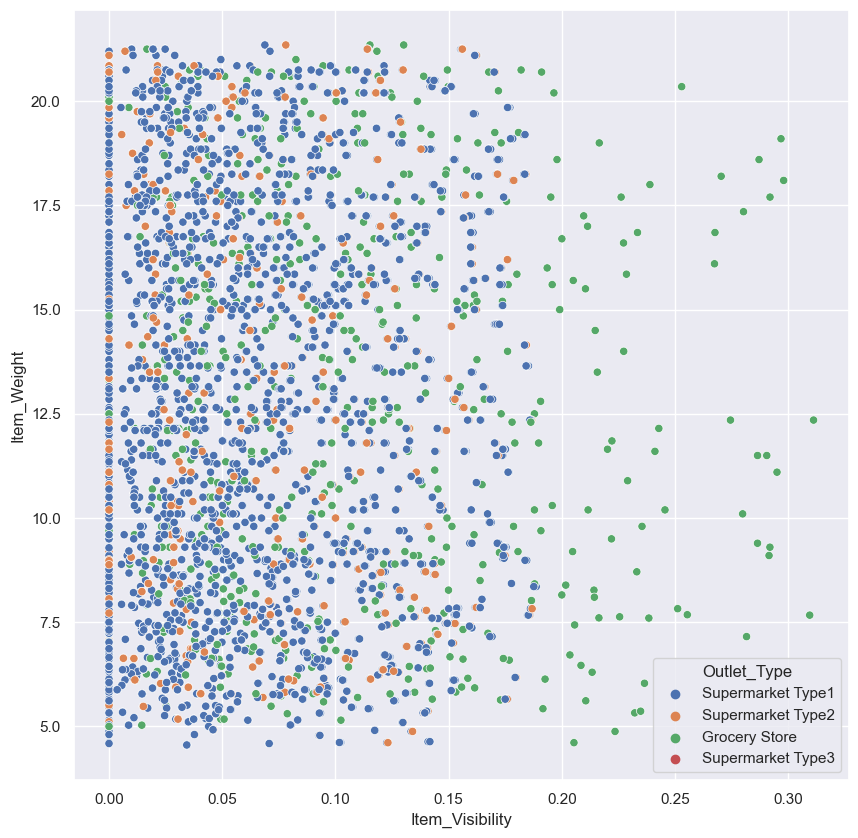

In [13]:
sns.scatterplot(data= Sales_P, x='Item_Visibility', y='Item_Weight', hue= 'Outlet_Type');
# this scatterplot show that the visibility is very importtant in Grocery stores.

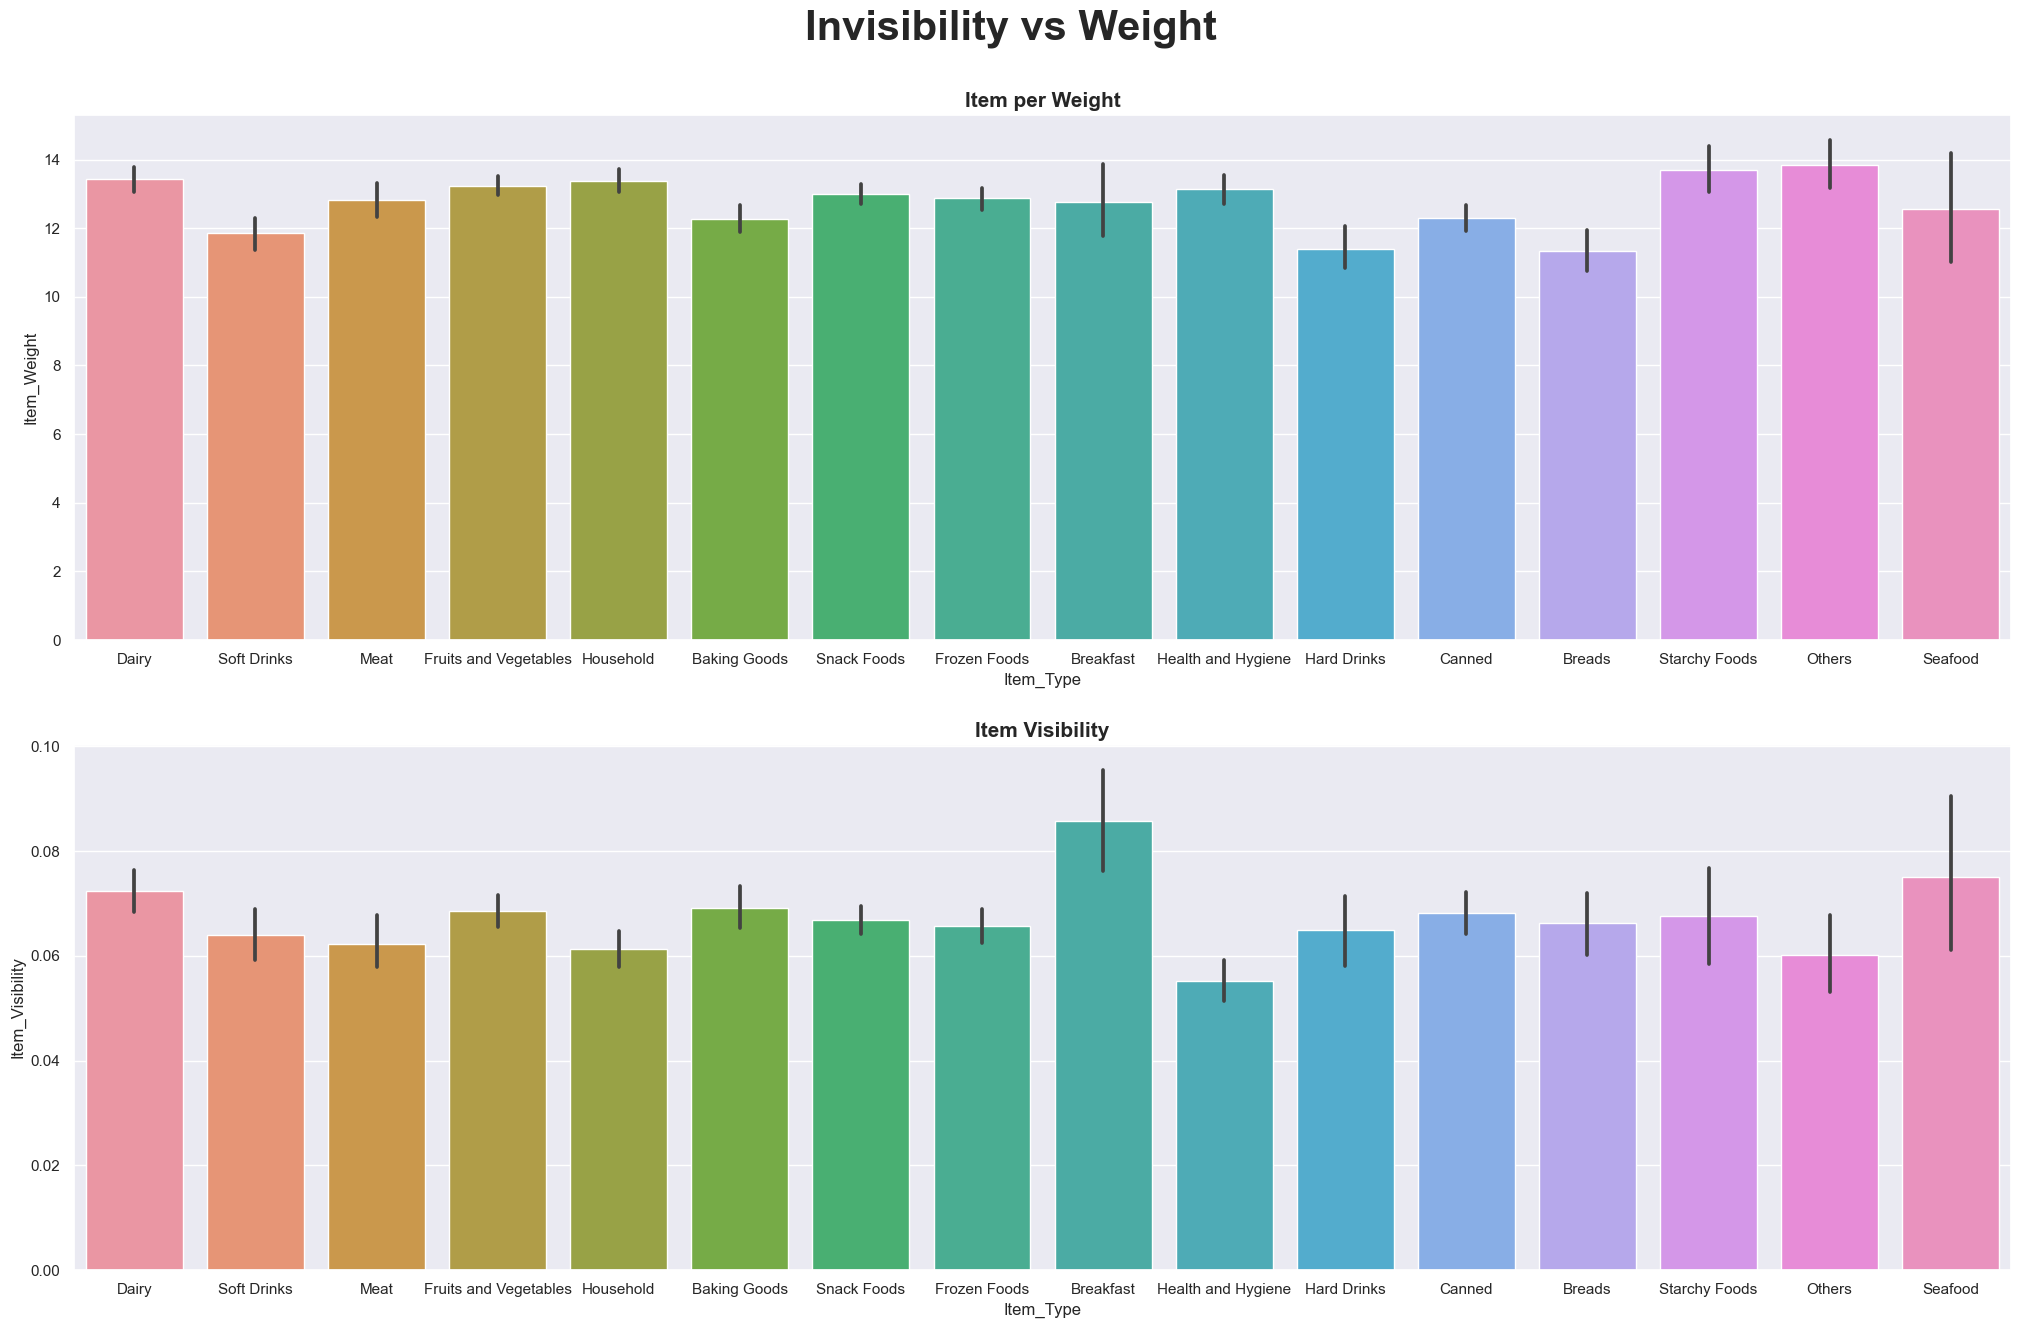

In [14]:
fig, axes = plt.subplots(nrows = 2, figsize = (25,15))

sns.barplot(data = Sales_P, x = 'Item_Type', y= 'Item_Weight', ax = axes[0])
axes[0].set_title('Item per Weight', fontsize = 15, fontweight = 'bold')


sns.barplot(data = Sales_P, x = 'Item_Type', y = 'Item_Visibility', ax = axes[1])
axes[1].set_title('Item Visibility', fontsize = 15, fontweight = 'bold')


fig.suptitle('Invisibility vs Weight', fontsize = 30, fontweight = 'bold', y = .95);

# I was trying to find a correlation between the wight and the visibility of an item but I don't see much difference between both bar graphs beneath.

# Project 1 Part 5
Identify the features (X) and target (y)

In [15]:
# Identified the X and Y made the split
X= Sales_P.drop(columns=['Item_Outlet_Sales'])
y= Sales_P['Item_Outlet_Sales']

#split performed
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = SEED)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,7.220,1,0.064142,Baking Goods,61.2510,1998,NaN,Tier 3,Grocery Store
7604,6.135,0,0.079294,Soft Drinks,111.2860,2009,Medium,Tier 3,Supermarket Type2
2762,12.150,0,0.028593,Household,151.0708,2004,Small,Tier 2,Supermarket Type1
6464,5.945,0,0.093009,Household,127.8652,2004,Small,Tier 2,Supermarket Type1
4707,18.200,1,0.066285,Fruits and Vegetables,247.2092,2004,Small,Tier 2,Supermarket Type1


Started the pipeline and transformer at the end

In [16]:
## make categorical selector and verify it works
cat_sel= make_column_selector(dtype_include='object')
cat_pipe= make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                        OneHotEncoder(handle_unknown='ignore', sparse=False))
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [17]:
## make numeric selector and verify it works
num_sel= make_column_selector(dtype_include='number')
num_pipe= make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [18]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe, cat_sel),
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000027FBE3F4430>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                               

In [19]:
## fit column transformer and get_feature_names_out
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,-1.319041e+00,1.363802,-0.043295,-1.268171,0.026015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,-1.574485e+00,-0.733244,0.248066,-0.459996,1.338206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,-1.583599e-01,-0.733244,-0.726880,0.182616,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,-1.619217e+00,-0.733244,0.511794,-0.192206,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,1.266006e+00,1.363802,-0.002094,1.735461,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,4.182118e-16,-0.733244,-1.041803,0.371897,-1.524756,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8360,-3.113909e-01,-0.733244,-0.990499,0.561178,0.145305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5929,-1.815803e+00,-0.733244,-0.604724,0.344948,0.503176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4220,-1.476781e+00,1.363802,-0.607519,0.286927,1.099626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_df).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_df).sum().sum(), 'missing values in testing data')
print('\n')
print('shape of data is', X_train_df.shape)
print('\n')
X_train_df[:5]

0 missing values in training data
0 missing values in testing data


shape of data is (6392, 32)




,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,-1.319041,1.363802,-0.043295,-1.268171,0.026015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,-1.574485,-0.733244,0.248066,-0.459996,1.338206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,-0.158360,-0.733244,-0.726880,0.182616,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,-1.619217,-0.733244,0.511794,-0.192206,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,1.266006,1.363802,-0.002094,1.735461,0.741756,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Coefficients with Linear Regression

In [21]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
        
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    ## return ax in case want to continue to update/modify figure
    return ax

In [22]:
lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

NameError: name 'evaluate_regression' is not defined

In [ ]:
# lin_reg.coef_
coefs= lin_reg.coef_

In [ ]:
features = lin_reg.feature_names_in_
features

coefs = pd.Series(coefs, index=features)
coefs.loc['intercept'] = lin_reg.intercept_
coefs

In [ ]:
## Testing our function with intercept=True
ax= plot_coeffs(coefs,top_n=3, intercept=True)

In [ ]:
## Testing our function with intercept=False (the default)
ax= plot_coeffs(coefs,top_n=3)

In [ ]:
lin_reg_ax = ax.get_figure()

In [ ]:
lin_reg_ax

### The coefficience show that the sale of items is depended on the store type. with supermarkets having a higher coefficience and grocery store type having a negfative effect on sales.

## Decision Tree

In [ ]:
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

reg_tree = DecisionTreeRegressor(random_state= SEED)
dec_pipe = make_pipeline(preprocessor, reg_tree)
dec_pipe.fit(X_train_df,y_train)
evaluate_regression(reg_tree, X_train_df, y_train, X_test_df, y_test)

In [ ]:
feature_names = preprocessor.get_feature_names_out()
feature_names

In [ ]:
## extract the importances
reg.feature_importances_

In [ ]:
## checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_)== len(X_train_df.columns)

In [ ]:
## saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                        name= 'Feature Importances')
importances

In [ ]:
## saving the feature importances sorted from smallest to largest (ascending=False)
sorted_importance = importances.sort_values()
sorted_importance

In [ ]:
# plotting top 5 importances
ax = sorted_importance.tail(5).plot(kind='barh',
                                     figsize=(7,5),
                                     )

ax.set(xlabel='Importance',
       ylabel='Feature Name',
       title= 'Top 5 Most Important Features');

fig_dc = plt.gcf()

In [ ]:
fig_dc

## Serialize Your Best Models with Joblib

In [ ]:
import joblib, os

## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train':y_train,
         'X_test':X_test_df,
         'y_test':y_test,
          'preprocessor':preprocessor,
         'LinearRegression': lin_reg,
          'DecisionTreeRegressor':reg_tree
         }

In [ ]:
folder = "Models/"
os.makedirs(folder, exist_ok=True)

In [ ]:
fname = folder+'best-models'
joblib.dump(export, fname)

In [ ]:
loaded = joblib.load(fname)
loaded.keys()